## Facebook GeoInsights  
https://www.facebook.com/geoinsights-portal/   
reference paper: https://research.fb.com/publications/facebook-disaster-maps-aggregate-insights-for-crisis-response-recovery/ 

### Movements between tiles

South: 37.49529 | West: -88.156013  
North: 41.896911 | East: -84.04232   

What specific pairs of map tiles are people moving between more or less often than we would expect based on pre-crisis levels?   

This dataset contains information about the number of people moving between tile pairs over a given time period. We measure this during baseline (movement between tile pairs averaged across the three weeks prior to the disaster) as well, so we can understand how many more or fewer people are moving during the disaster period compared to usual. This helps us distinguish disaster related movements from people’s normal migration patterns.  

The following metrics are available:  
* Date Time - The time period represented by the current map layer.
* Starting Location - The region or tile where the movement of the group started.
* Ending Location: The region or tile where the movement of the group ended.
* Length (km) - The distance traveled in kilometers.
* Baseline: People Moving - The total number of people who moved from Starting Location to Ending Location on average during the weeks before the disaster began.
* Crisis: People Moving - The total number of people who moved from Starting Location to Ending Location during the time period specified
* Difference - The difference between the number of people moving from Starting Location to Ending Location during the disaster compared to before the disaster.
* Percent Change - The percentage difference between the number of people moving from Starting Location to Ending Location during the disaster compared to before the disaster.
* Standard (Z) Score: The number of standard deviations by which the count of people moving during the crisis differs from the number of people moving during the baseline. Any z-value greater than 4 or smaller than -4 is clipped at 4 or -4.


### Movements between Administrative Regions
South: 37.49529 | West: -88.156013   
North: 41.896911 | East: -84.04232  

What specific pairs of places (admin regions) are people moving between more or less often than we would expect based on pre-crisis levels?  

Movement maps illustrate patterns of movement of groups of people between different neighborhoods or cities over a period of several hours. By understanding these patterns, response organizations can better predict where resources will be needed, gain insight into patterns of evacuation, or predict where traffic will be most congested.  

The following metrics are available:  

* Date Time - The time period represented by the current map layer.
* Starting Location - The region where the movement of the group started.
* Ending Location: The region where the movement of the group ended.
* Length (km) - The distance traveled in kilometers.
* Baseline: People Moving - The total number of people who moved from Starting Location to Ending Location on average during the weeks before the disaster began.
* Crisis: People Moving - The total number of people who moved from Starting Location to Ending Location during the time period specified
* Difference - The difference between the number of people moving from Starting Location to Ending Location during the disaster compared to before the disaster.
* Percent Change - The percentage difference between the number of people moving from Starting Location to Ending Location during the disaster compared to before the disaster.
* Standard (Z) Score: The number of standard deviations by which the count of people moving during the crisis differs from the number of people moving during the baseline. Any z-value greater than 4 or smaller than -4 is clipped at 4 or -4.

### Time conversion
GMT to localtime  
2020-07-03 0000 - 2020-07-02 2000   
2020-07-03 0800 - 2020-07-03 0400   
2020-07-03 1600 - 2020-07-03 1200  

In [1]:
from datetime import datetime, date, time, timezone
import pandas as pd
import geopandas
from shapely.geometry import LineString

In [2]:
def utc_to_local(utc_str):
    utc_time = datetime.strptime(time_str,"%Y-%m-%d %H%M")
    return utc_time.replace(tzinfo=timezone.utc).astimezone(tz=None)

In [3]:
time_str="2020-07-03 0800"
local_time = utc_to_local(time_str)
local_time.strftime("%Y-%m-%d %H%M")

'2020-07-03 0400'

### Interactive Movement Map

In [4]:
im_map = "Indiana Coronavirus Disease Prevention Map Apr 05 2020 Id Interactive Movement Map__2020-07-03.csv"

In [5]:
im_df = pd.read_csv(im_map)
im_df.head()

,utc_date,time,crisis_name,start_polygon_id,start_polygon_names,start_x,start_y,start_name_stack,end_polygon_id,end_polygon_names,end_x,end_y,end_name_stack,length_km,metric_name,metric_value,level,tile_size,country
0,2020-07-03,08:00,indiana_coronavirus_disease_prevention_map_apr...,1104919,Winchester,-84.141482,38.024368,Kentucky // Clark // Winchester,1104958,Lexington-Fayette Northwest,-84.474341,38.135525,Kentucky // Fayette // Lexington-Fayette North...,28.602977,n_baseline,NaN,LEVEL4,14,US
1,2020-07-03,08:00,indiana_coronavirus_disease_prevention_map_apr...,1104919,Winchester,-84.141482,38.024368,Kentucky // Clark // Winchester,1104958,Lexington-Fayette Northwest,-84.474341,38.135525,Kentucky // Fayette // Lexington-Fayette North...,28.602977,n_crisis,NaN,LEVEL4,14,US
2,2020-07-03,08:00,indiana_coronavirus_disease_prevention_map_apr...,1104919,Winchester,-84.141482,38.024368,Kentucky // Clark // Winchester,1104958,Lexington-Fayette Northwest,-84.474341,38.135525,Kentucky // Fayette // Lexington-Fayette North...,28.602977,n_difference,NaN,LEVEL4,14,US
3,2020-07-03,08:00,indiana_coronavirus_disease_prevention_map_apr...,1104919,Winchester,-84.141482,38.024368,Kentucky // Clark // Winchester,1104958,Lexington-Fayette Northwest,-84.474341,38.135525,Kentucky // Fayette // Lexington-Fayette North...,28.602977,percent_change,-23.076923,LEVEL4,14,US
4,2020-07-03,08:00,indiana_coronavirus_disease_prevention_map_apr...,1104919,Winchester,-84.141482,38.024368,Kentucky // Clark // Winchester,1104958,Lexington-Fayette Northwest,-84.474341,38.135525,Kentucky // Fayette // Lexington-Fayette North...,28.602977,z_score,-0.260623,LEVEL4,14,US


In [6]:
# convert to geopandas
im_df['geometry'] =  im_df.apply (lambda row: LineString([(row.start_x,row.start_y),(row.end_x,row.end_y)]), axis=1)

In [7]:
im_gdf = geopandas.GeoDataFrame(im_df, geometry='geometry')

In [9]:
# save as geojson format
#im_gdf.to_file(im_map.replace(".csv",".geojson"), driver='GeoJSON')

### Interactive Movement Map: county based expamle

In [10]:
# find movements
#start_name_stack #end_name_stack
county = "Monroe"
stack_str = "Indiana // " + county
county_gdf = im_gdf[(im_gdf["start_name_stack"].str.contains(stack_str) | im_gdf["end_name_stack"].str.contains(stack_str))]

In [11]:
# import indiana county shapefile
counties_shp = geopandas.read_file("gisdata/counties.shp")

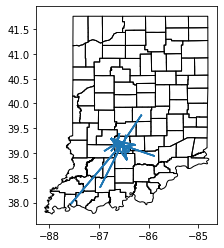

In [12]:
ax = counties_shp.plot(facecolor='none', edgecolor='black')
county_gdf.plot(ax=ax)

In [13]:
county_gdf['start_county']=county_gdf.apply(lambda row: row.start_name_stack.split("//")[1].strip(),axis=1) 
county_gdf['end_county']=county_gdf.apply(lambda row: row.end_name_stack.split("//")[1].strip(),axis=1) 

/Users/JunWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/JunWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
county_gdf

,utc_date,time,crisis_name,start_polygon_id,start_polygon_names,start_x,start_y,start_name_stack,end_polygon_id,end_polygon_names,...,end_name_stack,length_km,metric_name,metric_value,level,tile_size,country,geometry,start_county,end_county
155,2020-07-03,08:00,indiana_coronavirus_disease_prevention_map_apr...,1071980,Benton,-86.419916,39.249936,Indiana // Monroe // Benton,1071980,Benton,...,Indiana // Monroe // Benton,0.000000,n_baseline,81.800000,LEVEL4,14,US,"LINESTRING (-86.41992 39.24994, -86.41992 39.2...",Monroe,Monroe
156,2020-07-03,08:00,indiana_coronavirus_disease_prevention_map_apr...,1071980,Benton,-86.419916,39.249936,Indiana // Monroe // Benton,1071980,Benton,...,Indiana // Monroe // Benton,0.000000,n_crisis,112.000000,LEVEL4,14,US,"LINESTRING (-86.41992 39.24994, -86.41992 39.2...",Monroe,Monroe
157,2020-07-03,08:00,indiana_coronavirus_disease_prevention_map_apr...,1071980,Benton,-86.419916,39.249936,Indiana // Monroe // Benton,1071980,Benton,...,Indiana // Monroe // Benton,0.000000,n_difference,30.200000,LEVEL4,14,US,"LINESTRING (-86.41992 39.24994, -86.41992 39.2...",Monroe,Monroe
158,2020-07-03,08:00,indiana_coronavirus_disease_prevention_map_apr...,1071980,Benton,-86.419916,39.249936,Indiana // Monroe // Benton,1071980,Benton,...,Indiana // Monroe // Benton,0.000000,percent_change,36.473430,LEVEL4,14,US,"LINESTRING (-86.41992 39.24994, -86.41992 39.2...",Monroe,Monroe
159,2020-07-03,08:00,indiana_coronavirus_disease_prevention_map_apr...,1071980,Benton,-86.419916,39.249936,Indiana // Monroe // Benton,1071980,Benton,...,Indiana // Monroe // Benton,0.000000,z_score,1.123383,LEVEL4,14,US,"LINESTRING (-86.41992 39.24994, -86.41992 39.2...",Monroe,Monroe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55585,2020-07-03,16:00,indiana_coronavirus_disease_prevention_map_apr...,1071981,Bloomington,-86.520113,39.209539,Indiana // Monroe // Bloomington,1071986,Richland,...,Indiana // Monroe // Richland,3.447096,n_baseline,22.400000,LEVEL4,14,US,"LINESTRING (-86.52011 39.20954, -86.62866 39.2...",Monroe,Monroe
55586,2020-07-03,16:00,indiana_coronavirus_disease_prevention_map_apr...,1071981,Bloomington,-86.520113,39.209539,Indiana // Monroe // Bloomington,1071986,Richland,...,Indiana // Monroe // Richland,3.447096,n_crisis,14.000000,LEVEL4,14,US,"LINESTRING (-86.52011 39.20954, -86.62866 39.2...",Monroe,Monroe
55587,2020-07-03,16:00,indiana_coronavirus_disease_prevention_map_apr...,1071981,Bloomington,-86.520113,39.209539,Indiana // Monroe // Bloomington,1071986,Richland,...,Indiana // Monroe // Richland,3.447096,n_difference,-8.400000,LEVEL4,14,US,"LINESTRING (-86.52011 39.20954, -86.62866 39.2...",Monroe,Monroe
55588,2020-07-03,16:00,indiana_coronavirus_disease_prevention_map_apr...,1071981,Bloomington,-86.520113,39.209539,Indiana // Monroe // Bloomington,1071986,Richland,...,Indiana // Monroe // Richland,3.447096,percent_change,-35.897436,LEVEL4,14,US,"LINESTRING (-86.52011 39.20954, -86.62866 39.2...",Monroe,Monroe


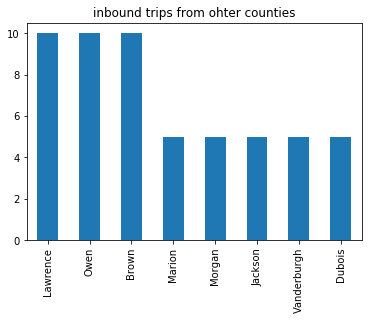

In [15]:
county_gdf[county_gdf.start_county != county]['start_county'].value_counts().plot(kind='bar',title="inbound trips from ohter counties")

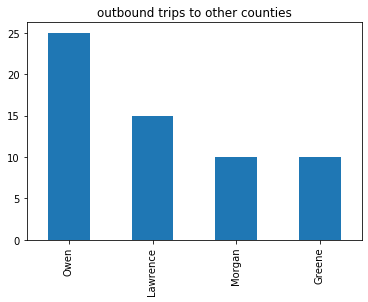

In [16]:
county_gdf[county_gdf.end_county != county]['end_county'].value_counts().plot(kind='bar',title="outbound trips to other counties")

In [18]:
#county_gdf.to_file(county + ".geojson", driver='GeoJSON')

In [34]:
total_trip = county_gdf.size
in_trip = county_gdf[county_gdf.start_county != county].size
out_trip = county_gdf[county_gdf.end_county != county].size
inside_trip = total_trip - in_trip - out_trip
print("Trips inside " + county, inside_trip, inside_trip/total_trip)
print("Trips inbound " + county, in_trip, in_trip/total_trip)
print("Trips inside " + county, out_trip, out_trip/total_trip)


Trips inside Monroe 8470 0.77
Trips inbound Monroe 1210 0.11
Trips inside Monroe 1320 0.12
